# 1.使用梯度上升法求解主成分

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#我们先写出两个特征
X = np.empty((100,2)) #生成一个空数组  2*2 
X[:,0] = np.random.uniform(0.,100.,size=100)   #随机取样  在0-99之间
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0.,10.,size=100)

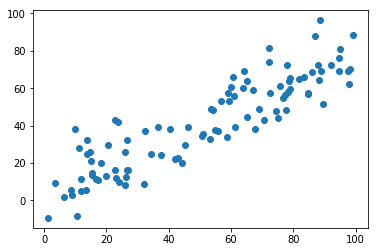

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show()

# 对数据进行将维 demean 数据的均值归零

In [15]:
X = np.arange(0.,15.).reshape(3,5)
X.reshape(-1,1)

array([[  0.],
       [  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.],
       [ 11.],
       [ 12.],
       [ 13.],
       [ 14.]])

In [7]:
#np.mean(X,axis=0)

In [8]:
# 我们   每个样本的每一个特征都要减去对每一个特征的平均值
def demean(X):
    return X - np.mean(X,axis=0)

In [9]:
X_demean = demean(X)

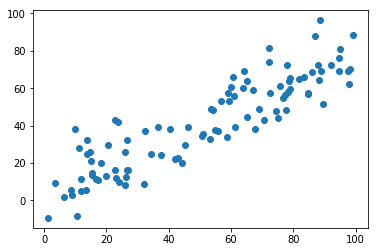

In [11]:
plt.scatter(X[:,0],X[:,1])
plt.show()

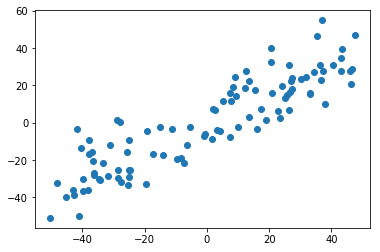

In [12]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

In [25]:
#我们可以试验一下在第0个维度的平均值
np.mean(X_demean[:,0])

1.6733281427150359e-14

In [26]:
np.mean(X_demean[:,1])     #趋近为0

-7.3541173151170364e-15

In [29]:
# 梯度上升法

# 目标函数
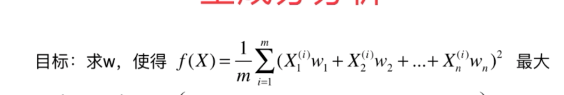

In [30]:
def f(w,X):
    return np.sum(X.dot(w)) /len(X)

# 梯度函数
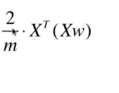

In [32]:
def df_math(w,X):
    return  X.T.dot(X.dot(w)) *2. /len(X)

In [51]:
#用我们的debug方法来测试我们的梯度正不正确
#因为w是一个方向向量，所以epsilon的取值相对而言要小一些
def df_debug(w,X,epsilon = 0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] +=epsilon
        w_2 = w.copy()
        w_2[i] -=epsilon
        res[i] = (f(w_1,X) - f(w_2,X))/(2*epsilon)
    return res

In [52]:
#对于我们的w   实际上只代表方向，他的膜=1  ，当我们执行w = w + eta * gradient时，
#有可能我们的w不为1，因此我们需要对我们的w进行特殊处理，每一次都让w的膜等于1
#，让他成为一个单位方向向量    向量除以向量的膜
def direction(w):
    return w/np.linalg.norm(w)

def gradient_ascent(df,X_b,initial_w,eta,n_iters = 1e4,epsilon = 1e-8):
    
    w =direction(initial_w)
    cur_iter = 0
    while cur_iter<n_iters:
        gradient = df(initial_w,X_b)
        last_w = w
        w = w + eta * gradient
        w = direction(w)   #注意1   每一次都要将w归为一个单位方向向量
        if(abs(f(w,X)-f(last_w,X))<epsilon):
            break
        
        cur_iter+=1
        
    return w

In [53]:
#此处我们的w的初始值不能为0   因为我们的梯度求导的公式中将w为0带进去
#就得出没有任何方向的0 对于我们的目标函数来说 w=0  带进去  本身就是一个极值，
#是一个极小值   梯度也为 0  所以把0向量带进去是不可以的
initial_w =np.random.random(X.shape[1])  #注意不能为0
initial_w

array([ 0.82616292,  0.25409311])

In [54]:
eta = 0.001

In [55]:
#注意  我们在PCA中不能使用我们的归一化 StandardScaler标准化数据
#因为我们本来求得是方差的最大值   而我们归一化后我们的方差就为1了  
#最大值就不存在了

In [56]:
gradient_ascent(df_debug,X,initial_w,eta)

array([ 0.78621179,  0.61795714])

In [62]:
gradient_ascent(df_math,X,initial_w,eta)

array([ 0.78653011,  0.61755193])

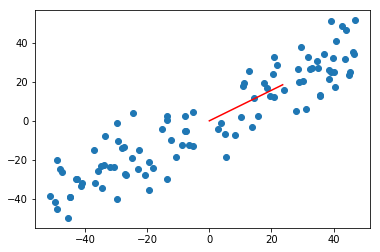

In [64]:
w = gradient_ascent(df_math,X,initial_w,eta)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],color='r')    #w是一个方向向量 *30的原因是数据太小显示不出来
plt.show()

In [66]:
#选用一个极端的数据
X2 = np.empty((100,2))
X2[:,0] = np.random.uniform(0.,100.,size = 100)
X2[:,1] = 0.75*X2[:,0]+3

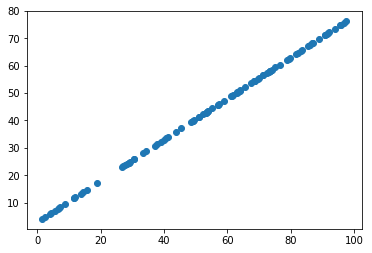

In [68]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [69]:
X2_demean = demean(X2)

In [75]:
w2 = gradient_ascent(df_math,X2_demean,initial_w,eta)
w2

array([ 0.8,  0.6])

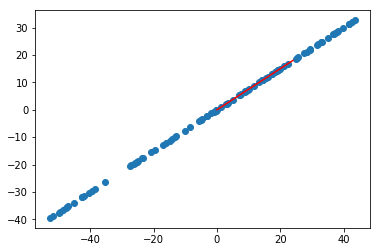

In [76]:
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0,w2[0]*30],[0,w2[1]*30],color='r')
plt.show()